# Sugestão Spotify

## Objetivos do projeto:
<p style = "text-indent:4em"> Neste projeto, decidiu-se fazer um método de sugestão de músicas do Spotify. Para isso, decidiu-se utilizar duas maneiras de separar os dados em grupos:</p>
<ol>
    <li>
        <b>Clusterização:</b> dividindo as músicas por meio da análise de algumas variáveis mais relacionadas ao som
    </li>
    <li>
        <b>Classificação:</b> classificando os dados por meio da letra da música
    </li>
</ol>
<p style = "text-indent:4em"> Feito isso, pede-se uma playlist e recomenda-se 3 músicas baseado nas etapas anteriores</p>

## Construindo Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import csv 
df3 = pd.read_csv('misturadas.csv') #Dataset

In [ ]:
dflista=[] #lista de dataframes com informações da musica advindas do próprio dataset juntamente ao ID do spotify 
listadfs # lista de dataframes com as informações do spotify para cada música

In [ ]:
# Achar os Ids do spotify de 2000 músicas do dataset para depois obter os parâmetros 'energy','tempo'e 'valence',

import spotipy 
from numpy import arange
from spotipy.oauth2 import SpotifyClientCredentials 
sp = spotipy.Spotify()

cid ="client_Id" 
secret = "client_secret" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 

for a in list(arange(0,2000,100)): #Fazendo pedidos de 100 em 100 músicas para o spotify 
    df2=df3[a:a+100]
    lista_id=[]
    n=a
    lista_musicas=[]
    lista_artista=[]
    lista_letra=[]
    lista_link=[]
    lista=[] #guarda ids das musicas no spotify
    

    for i in df2.song:
        lista_musicas.append(i) 
        lista_artista.append(df2.artist[n]) #guarda nome do artista
        lista_letra.append(df2.text[n]) #guarda letra da música
        lista_link.append(df2.link[n]) #guarda link da letra da música
        lista_id=[] 
        lista_id=sp.search(q='artist:' + df2.artist[n] + ' track:' + i, type='track')#procura música no spotify mediante nome e artista
        lista_id=lista_id["tracks"]   
        lista_id=lista_id["items"]
        if lista_id==[]:    # se a música não existe no spotify colocar valor igual a 0
            lista.append(0)
        else: 
            lista_id=lista_id[0] 
            lista.append(lista_id["id"]) #se a musica existe deve-se pegar seu ID das informações fornecidas pelo spotify e guardar em uma lista    
        n=n+1    
    d = {'id':lista, 'nome':lista_musicas, "artista": lista_artista,"letra": lista_letra, "link":lista_link}
    df = pd.DataFrame(data=d) #cria dataframe para as informações da musica guardadas nas listas 
    for i in df: #filtragem do dataframe df
         n=0
         for c in df[i]:
            if c==0:
                df=df.drop(n)
                lista.append(n)

            n=n+1
    dflista.append(df) # lista de dataframes com informações da musica advindas do próprio dataset juntamente ao ID do spotify
    features = sp.audio_features(df["id"])#pede as informaçãoes do spotify sobre determinada música mediante seu id 
    df4 = pd.DataFrame(features)#transforma as informações do spotify em um dataframe
    listadfs.append(df4)  # lista de dataframes com as informações do spotify para cada música
    


In [ ]:
df_new  =  pd . concat (listadfs) # juntar dataframes com as informações do spotify sobre as músicas inclusive o ID
df_new
df_new2  =  pd . concat (dflista) # junta dataframes com as informações do datset para cada música junto com o ID do spotify
df_new2
df_new2=pd . merge( df_new ,  df_new2 ,  on = 'id') #junta o dataframe das informações do spotify com as do dataset em realção ao id
df_new2

#filtragem do dataset com todos os dados
lista_variaveis=['energy','tempo','valence','id',"nome","artista","letra","link"] #determina quais colunas desejamos ter no dataset
for i in df_new2: # retira colunas indesejadas do dataser
    if i in lista_variaveis:
        continue
    else:
        df_new2=df_new2.drop(i, axis=1)

lista=[]
for i in df_new2: #retira valores nulos
        n=0
        for c in df_new2[i]:

            if c==0:
                df_new2=df_new2.drop(n)
                lista.append(n)
            n=n+1
df_new=df_new2.drop_duplicates() #retira valores duplicados
df_new

In [ ]:
df_new.to_csv('certo.csv', sep=',')
df_new.to_excel('certo.xlsx')

## 1) Clusterização:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics
from scipy.spatial.distance import cdist, pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
import scipy
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import json
from Musixmatch_codigo import Musixmatch

In [25]:
def _set_page_size(page_size):

    if page_size > 100:

        page_size = 100

    elif page_size < 1:

        page_size = 1

    return page_size


In [26]:
dados = pd.read_csv('certo.csv')
x1 = dados.energy
x2 = dados.tempo
x3= dados.valence
X = np.array(list(zip(x1,x2,x3))).reshape(len(x1), 3)
L=X #variável sera usada na validação da clusterização

<p style = "text-indent:4em"> Após a análise do resultado obtido por várias técnicas de clusterização, decidiu-se utilizar o K-means, pois foi considerado o resultado mais adequado</p>

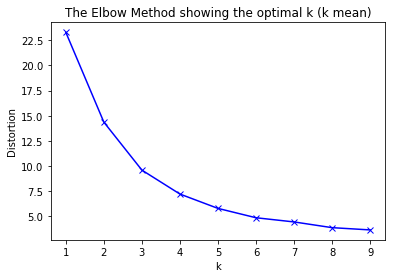

In [27]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()

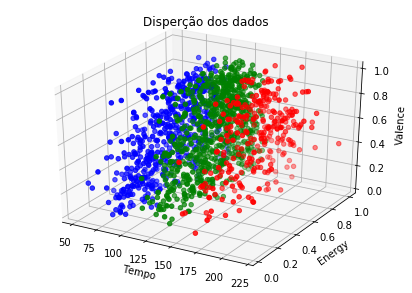

In [28]:
kmean = cluster.KMeans(n_clusters=3).fit(X)
labels_kmean = kmean.labels_
dados.loc[:,'Cluster'] = labels_kmean
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados.tempo[dados.Cluster==0],dados.energy[dados.Cluster==0],  dados.valence[dados.Cluster==0],marker = 'o',c='blue')
ax.scatter(dados.tempo[dados.Cluster==1],dados.energy[dados.Cluster==1], dados.valence[dados.Cluster==1],marker = 'o',c='green')
ax.scatter(dados.tempo[dados.Cluster==2],dados.energy[dados.Cluster==2],dados.valence[dados.Cluster==2],marker = 'o',c='red')
ax.set_title('Disperção dos dados')
ax.set_xlabel('Tempo')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
plt.show()

In [29]:
minemax = [{'Mínimo' : min(dados.energy[dados.Cluster==2]), 'Máximo' :  max(dados.energy[dados.Cluster==2]), 'Cluster' : 2},
           {'Mínimo' : min(dados.energy[dados.Cluster==1]), 'Máximo' :  max(dados.energy[dados.Cluster==1]), 'Cluster' : 1},
          {'Mínimo' : min(dados.energy[dados.Cluster==0]), 'Máximo' :  max(dados.energy[dados.Cluster==0]), 'Cluster' : 0}]
analise = pd.DataFrame(minemax)
analise = analise[['Mínimo','Máximo','Cluster']]
analise

,Mínimo,Máximo,Cluster
0,0.0259,0.997,2
1,0.0170,0.992,1
2,0.0223,0.995,0


In [30]:
minemax2 = [{'Mínimo' : min(dados.valence[dados.Cluster==2]), 'Máximo' :  max(dados.valence[dados.Cluster==2]), 'Cluster' : 2},
           {'Mínimo' : min(dados.valence[dados.Cluster==1]), 'Máximo' :  max(dados.valence[dados.Cluster==1]), 'Cluster' : 1},
          {'Mínimo' : min(dados.valence[dados.Cluster==0]), 'Máximo' :  max(dados.valence[dados.Cluster==0]), 'Cluster' : 0}]
analise2 = pd.DataFrame(minemax2)
analise2 = analise2[['Mínimo','Máximo','Cluster']]
analise2

,Mínimo,Máximo,Cluster
0,0.0334,0.969,2
1,0.0396,0.984,1
2,0.0378,0.968,0


In [31]:
minemax3 = [{'Mínimo' : min(dados.tempo[dados.Cluster==1]), 'Máximo' :  max(dados.tempo[dados.Cluster==1]), 'Cluster' : 1},
            {'Mínimo' : min(dados.tempo[dados.Cluster==2]), 'Máximo' :  max(dados.tempo[dados.Cluster==2]), 'Cluster' : 2},
          {'Mínimo' : min(dados.tempo[dados.Cluster==0]), 'Máximo' :  max(dados.tempo[dados.Cluster==0]), 'Cluster' : 0}]
analise3 = pd.DataFrame(minemax3)
analise3 = analise3[['Mínimo','Máximo','Cluster']]
analise3

,Mínimo,Máximo,Cluster
0,108.579,146.367,1
1,146.776,217.897,2
2,51.952,108.535,0


<p style = "text-indent:4em"> A partir das tabelas acima, percebe-se que a variável que está controlando a divisão dos clusters é <b><em>tempo</em></b>. Estabilizando-a, pode-se obter os resultados a seguir.</p>

In [32]:
dados_0= dados[dados.Cluster==0]
x4 = dados_0.energy
x5 = dados_0.valence
X2 = np.array(list(zip(x4,x5))).reshape(len(x4), 2)

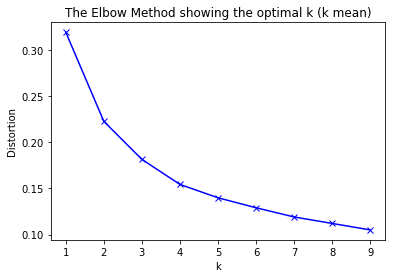

In [33]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X2)
    distortions.append(sum(np.min(cdist(X2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X2.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()

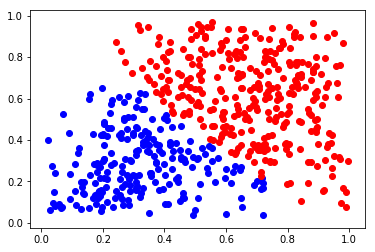

In [34]:
kmean = cluster.KMeans(n_clusters=2).fit(X2)
labels_kmean2 = kmean.labels_
dados.loc[dados.Cluster==0,'Clusterfinal'] = labels_kmean2
plt.scatter(dados.energy[dados.Clusterfinal==0],dados.valence[dados.Clusterfinal==0],marker = 'o', c = 'blue')
plt.scatter(dados.energy[dados.Clusterfinal==1],dados.valence[dados.Clusterfinal==1],marker = 'o', c = 'red')
plt.show()     


In [35]:
dados_1= dados[dados.Cluster==1]
x6 = dados_1.energy
x7 = dados_1.valence
X3 = np.array(list(zip(x6,x7))).reshape(len(x6), 2)

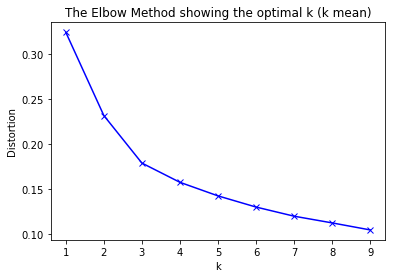

In [36]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X3)
    distortions.append(sum(np.min(cdist(X3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X3.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()

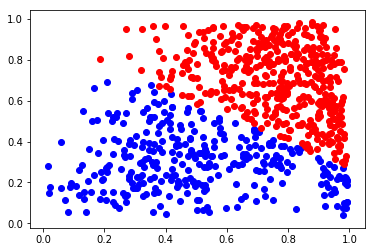

In [37]:
kmean = cluster.KMeans(n_clusters=2).fit(X3)
labels_kmean3 = kmean.labels_
dados.loc[dados.Cluster==1,'Clusterfinal'] = labels_kmean3+2
plt.scatter(dados.energy[dados.Clusterfinal==2],dados.valence[dados.Clusterfinal==2],marker = 'o', c = 'blue')
plt.scatter(dados.energy[dados.Clusterfinal==3],dados.valence[dados.Clusterfinal==3],marker = 'o', c = 'red')
plt.show()       

In [38]:
dados_2= dados[dados.Cluster==2]
x8 = dados_2.energy
x9 = dados_2.valence
X4 = np.array(list(zip(x8,x9))).reshape(len(x8), 2)

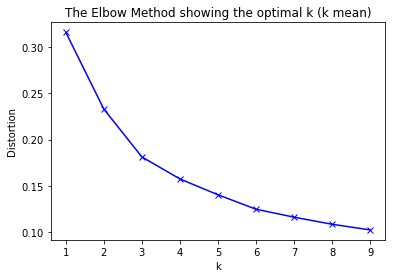

In [39]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X4)
    distortions.append(sum(np.min(cdist(X4, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X4.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()

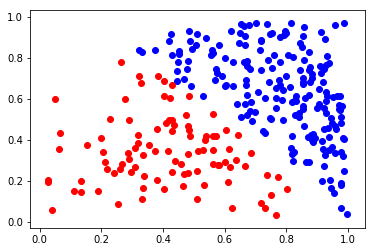

In [40]:
kmean = cluster.KMeans(n_clusters=2).fit(X4)
labels_kmean = kmean.labels_
dados.loc[dados.Cluster==2,'Clusterfinal'] = labels_kmean+4
plt.scatter(dados.energy[dados.Clusterfinal==4],dados.valence[dados.Clusterfinal==4],marker = 'o', c = 'blue')
plt.scatter(dados.energy[dados.Clusterfinal==5],dados.valence[dados.Clusterfinal==5],marker = 'o', c = 'red')
plt.show()    

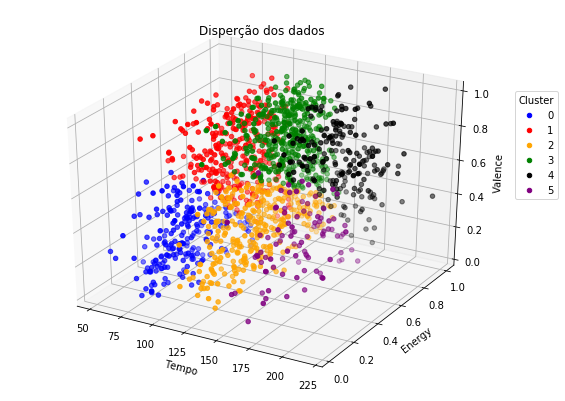

In [41]:

fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados.tempo[dados.Clusterfinal==0],dados.energy[dados.Clusterfinal==0],  dados.valence[dados.Clusterfinal==0],marker = 'o',c='blue', label='0')
ax.scatter(dados.tempo[dados.Clusterfinal==1],dados.energy[dados.Clusterfinal==1],  dados.valence[dados.Clusterfinal==1],marker = 'o',c='red', label='1')
ax.scatter(dados.tempo[dados.Clusterfinal==2],dados.energy[dados.Clusterfinal==2],  dados.valence[dados.Clusterfinal==2],marker = 'o',c='orange', label='2')
ax.scatter(dados.tempo[dados.Clusterfinal==3],dados.energy[dados.Clusterfinal==3],  dados.valence[dados.Clusterfinal==3],marker = 'o',c='green', label='3')
ax.scatter(dados.tempo[dados.Clusterfinal==4],dados.energy[dados.Clusterfinal==4],  dados.valence[dados.Clusterfinal==4],marker = 'o',c='black', label='4')
ax.scatter(dados.tempo[dados.Clusterfinal==5],dados.energy[dados.Clusterfinal==5],  dados.valence[dados.Clusterfinal==5],marker = 'o',c='purple', label='5')
ax.set_title('Disperção dos dados')
ax.set_xlabel('Tempo')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
plt.legend(bbox_to_anchor=(1.1, 0.8), ncol=1, title='Cluster')
plt.show()

### Validação:

In [42]:
#separando dataframe em treinamento e teste
trei=dados[0:750] #treinamento
tes=dados[751:1553] #teste
X=L[0:750] #o que foi classificado no treinamento
K=L[751:1553] #o que deve ser classificado


### Classificação: Cluster

In [43]:
#Import Library
#Import other necessary libraries like pandas, numpy...
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
model.fit(X, trei['Cluster'])
model.score(X, trei['Cluster'])
#Predict Output
predicted= model.predict(K)

#porcentagem de acertos:
manxdig=pd.crosstab(predicted,tes['Cluster'],margins=True,rownames=['Digital'] , colnames=['Manual'], normalize=True)*100
print('\033[1m'+'  Classificação Manual X Digital')
manxdig


  Classificação Manual X Digital


Manual,0,1,2,All
Digital,,,,
0,33.042394,0.000000,0.000000,33.042394
1,0.249377,48.503741,0.000000,48.753117
2,0.000000,0.000000,18.204489,18.204489
All,33.291771,48.503741,18.204489,100.000000


### Classifiação: Cluster Final

In [44]:
#Import Library
#Import other necessary libraries like pandas, numpy...
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
model.fit(X, trei['Clusterfinal'])
model.score(X, trei['Clusterfinal'])
#Predict Output
predicted= model.predict(K)

#porcentagem de acertos:
manxdig=pd.crosstab(predicted,tes['Clusterfinal'],margins=True,rownames=['Digital'] , colnames=['Manual'], normalize=True)*100
print('\033[1m'+'  Classificação Manual X Digital')
manxdig

  Classificação Manual X Digital


Manual,0.0,1.0,2.0,3.0,4.0,5.0,All
Digital,,,,,,,
0.0,12.967581,0.498753,0.000000,0.000000,0.000000,0.000000,13.466334
1.0,0.374065,19.201995,0.000000,0.000000,0.000000,0.000000,19.576060
2.0,0.000000,0.249377,18.952618,0.997506,0.000000,0.000000,20.199501
3.0,0.000000,0.000000,0.623441,27.930175,0.000000,0.000000,28.553616
4.0,0.000000,0.000000,0.000000,0.000000,12.219451,0.997506,13.216958
5.0,0.000000,0.000000,0.000000,0.000000,0.374065,4.613466,4.987531
All,13.341646,19.950125,19.576060,28.927681,12.593516,5.610973,100.000000


## 2) Classificador:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import nltk 
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import SnowballStemmer 
f='class7'
d='a/na'

### Dados e filtragem:

In [4]:
teste=pd.read_excel("treinamento.xlsx")
treinamento=pd.read_excel("testemusicas.xlsx")

#Tranformar todas as letras em minusculas:
teste['letra'] = teste['letra'].str.lower() 
treinamento['letra'] = treinamento['letra'].str.lower()

In [5]:
#Limpando o dataset treinamento
for i in range(len(treinamento)):
    caract=[',',';','.','!','?',"(",")", ':', '"', "'",]      #caracteres que se desejam retirar
    palavras = treinamento.loc[i,('letra')].split()         # criando lista de listas de palavras em cada mensagem
    letras=[]                                              #lista de lista de letras das palvras
    final=[]                                                #lista de mensagens no final do processo
    for x in palavras:#passando palavra por palavra
        letrasporpalavra=[]                                #lista que irá conter as letras das palavras no for
        for a in range(len(x)):                            #passando letra por letra
            letrasporpalavra.append(x[a].lower())                   #adicionando cada letra na lista
        letras.append(letrasporpalavra)                 #adicionando lista de lista com as letras
    for z in letras:                                    #passando item/lista por lista
        for w in z:                                     #dentro da lista, passando letra por letra
            if w in caract:                            #se estiver entre os caracteres
                d=z.index(w)                           #pega o indice desse caracter
                z[d] = ' '                             #substitui ele na lista por um espaço
    for q in range(len(letras)):                      #q vai passar pelos índices da lista letras (palavra por palavra)
        junto = ''.join(letras[q])#junto vai tranformar a lista de letras em palavras           
        if len(junto)!=0: 
            if junto[0] !='@' and junto[0:5]!='https'and junto!= 'rt' and junto[0:3]!='kkk'and junto[0:2]!="\n":#retira alguns outros itens
                final.append(junto)                 #adiciona na lista final

    treinamento.loc[i,('letra')] = ' '.join(final) #junta as palavras das mensagens e substitui as mensagens 


In [6]:
#limpando teste

for i in range(len(teste)):
    caract=[',',';','.','!','?',"(",")", ':', '"', "'","\n"]      #caracteres que se desejam retirar
    palavras = teste.letra[i].split() # criando lista de listas de palavras em cada mensagem
    letras=[]                                              #lista de lista de letras das palvras
    final=[]                                                #lista de mensagens no final do processo
    for x in palavras:#passando palavra por palavra
        letrasporpalavra=[]                                #lista que irá conter as letras das palavras no for
        for a in range(len(x)):                            #passando letra por letra
            letrasporpalavra.append(x[a].lower())                   #adicionando cada letra na lista
            
        letras.append(letrasporpalavra)                 #adicionando lista de lista com as letras
    for z in letras:                                    #passando item/lista por lista
        for w in z:                                     #dentro da lista, passando letra por letra
            if w in caract:                            #se estiver entre os caracteres
                d=z.index(w)                           #pega o indice desse caracter
                z[d] = ' '                             #substitui ele na lista por um espaço
    for q in range(len(letras)):                      #q vai passar pelos índices da lista letras (palavra por palavra)
        junto = ''.join(letras[q])#junto vai tranformar a lista de letras em palavras           
        if len(junto)!=0: 
            if junto[0] !='@' and junto[0:5]!='https'and junto!= 'rt' and junto[0:3]!='kkk' and junto[0:2]!="\n":#retira alguns outros itens
                final.append(junto)                 #adiciona na lista final

    teste.loc[i,('letra')]= ' '.join(final) #junta as palavras das mensagens e substitui as mensagens 

treinamento

,id,artista,letra,link,nome,class,class2,class3,class4,class5,class6,class7,a/na,num
0,4yOaj5AUW7WPNSwQPFqDoG,Lady Gaga,put some lipstick on perfume your neck and sli...,/l/lady+gaga/manicure_21067952.html,Manicure,a,a,a,a,a,a,rg,a,1
1,6kpvKJqZthatVHJGBsIuaE,Carpenters,somebody s been lyin somebody s been callin ...,/c/carpenters/somebodys+been+lyin_20027534.html,Somebody's Been Lyin',cp,cp,a,cp,a,rb,rb,a,2
2,1yWIGcVl0i8qWEHUBMgmHm,Irving Berlin,in your easter bonnet with all the frills upo...,/i/irving+berlin/easter+parade_20068099.html,Easter Parade,a,rg,rg,r,r,rg,rg,na,3
3,6nsxXdOAjeosqcGGsmPjnN,Neil Young,well they say that santa fe is less than nine...,/n/neil+young/albuquerque_20099209.html,Albuquerque,r,rb,rb,r,r,rb,rb,na,4
4,3uyE5Hanxu4OBLjaHpvCTS,Leann Rimes,look how the wind carries the sea and see how ...,/l/leann+rimes/why+cant+we_20341998.html,Why Can't We,cp,cp,a,cp,a,rb,rb,na,5
5,7nZWNZ9dvKmNYgyqZLjhae,Carly Simon,orpheus it could have been you could have hel...,/c/carly+simon/orpheus_20027315.html,Orpheus,cp,cp,a,cp,a,rb,rb,a,6
6,7M8yPiV1ohjGH3teFEFgPj,Cyndi Lauper,all she ever wanted when the day turned indigo...,/c/cyndi+lauper/rocking+chair_20744672.html,Rocking Chair,r,rg,rg,r,r,rg,rg,na,7
7,2E8b9rCHCWNr0CrZSTVJCT,Lana Del Rey,let s get out of this town baby we re on fire...,/l/lana+del+rey/lucky+ones_20997522.html,Lucky Ones,a,a,a,a,a,a,rg,a,8
8,3lAxX47BnSDTTtlCcxSiEw,Korn,all the lying and cheating will surely bite yo...,/k/korn/let+the+guilt+go_20473423.html,Let The Guilt Go,cp,rb,rb,r,r,rb,rb,na,9
9,6U60VgPXV63tuIm6uhF1mP,Hillsong United,your love reaches out to me your grace has mad...,/h/hillsong+united/kingdom+come_20777716.html,Kingdom Come,a,a,a,a,a,a,rg,a,10


### O classificador:

Após testes com os metódos: Tfi-df, n-grams e Steaming aplicados ao classificador nayve bayes, observamos que a combinação dosn tres metodos geraram as melhores porcentagens.

### Filtrando datasets com base no método Steam:

In [14]:
snowball_stemmer = SnowballStemmer("english") 
for i in range(len(teste)):    
    palavras = teste.letra[i].split()                # criando lista de listas de palavras em cada mensagem
    letras=[]                                              #lista de lista de letras das palvras
    final=[]                                                #lista de mensagens no final do processo
    for x in palavras:#passando palavra por palavra
        y=snowball_stemmer.stem(x)    #achar raiz da palavra
        final.append(y)                 #adiciona na lista final com raiz da palavra
      
    teste.loc[i,('letra')] = ' '.join(final) #junta as palavras das mensagens e substitui as mensagens de Treinamento
for i in range(len(treinamento)):   
    palavras = treinamento.letra[i].split()                # criando lista de listas de palavras em cada mensagem
    letras=[]                                              #lista de lista de letras das palvras
    final=[]                                                #lista de mensagens no final do processo
    for x in palavras:#passando palavra por palavra
        y=snowball_stemmer.stem(x)
        final.append(y) 
    treinamento.loc[i,('letra')]= ' '.join(final)#adiciona na lista final a raiz da palavras
 


### N-gram  + Steam + Tfidf

Primeiramente, as  letras das musicas foram classifadas enquanto significados positivos e significados negativos

In [15]:
import numpy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text  import  TfidfVectorizer 
from  sklearn.feature_extraction.text  import  TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB

p= Pipeline([                       
    ('count_vectorizer',   CountVectorizer(ngram_range=(1, 3))),   # método n-grams
    ('tfidf_transformer',  TfidfTransformer()),  #metodo Tfidf
    ('classifier',  MultinomialNB()) ])

l=p.fit(treinamento['letra'], treinamento[f] ) # ensinando o classificador


predictions = l.predict(teste['letra'])#requisitando precisões do classificador
predictions 
#porcentagem de acertos:
manxdig=pd.crosstab(predictions,teste[f],margins=True,rownames=['Digital'] , colnames=['Manual'], normalize=True)*100
print('\033[1m'+'  Classificação Manual X Digital')
manxdig

  Classificação Manual X Digital


Manual,rb,rg,All
Digital,,,
rb,47.457627,18.644068,66.101695
rg,11.864407,22.033898,33.898305
All,59.322034,40.677966,100.000000


In [16]:
porcacerto = manxdig.rb.rb+manxdig.rg.rg

porcacerto

69.491525423728817

A segunda classificação binária deu-se pela presença ou não de um tema recorrente em músicas:amor

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text  import  TfidfVectorizer 
from  sklearn.feature_extraction.text  import  TfidfTransformer 

p= Pipeline([
    ('count_vectorizer',   CountVectorizer(ngram_range=(1, 3))), # método n-grams
    ('tfidf_transformer',  TfidfTransformer()), #metodo Tfidf
    ('classifier',  MultinomialNB()) ])

l=p.fit(treinamento['letra'], treinamento['a/na'] ) # ensinando o classificador


predictions = l.predict(teste['letra']) #requisitando precisões do classificador
predictions 
#porcentagem de acertos:
manxdig=pd.crosstab(predictions,teste['a/na'],margins=True,rownames=['Digital'] , colnames=['Manual'], normalize=True)*100
print('\033[1m'+'  Classificação Manual X Digital')
manxdig

  Classificação Manual X Digital


Manual,a,na,All
Digital,,,
a,23.728814,16.949153,40.677966
na,8.474576,50.847458,59.322034
All,32.203390,67.796610,100.000000


In [18]:
porcacerto = manxdig.na.na+manxdig.a.a

porcacerto

74.576271186440678

## 3) Recomendação:

In [3]:
def corta_link(url):
    barras=[]
    user=[]
    playlist=[]
    for x in url:
        if x == '/':
            barras.append('/')
        if len(barras)==4 and x!= "/":
            user.append(x)
        if len(barras)==6 and x!= "/":
            playlist.append(x)
    usuario = user[0]
    for y in range(1,len(user)):
        usuario+=user[y]
    lista = playlist[0]
    for z in range(1,len(playlist)):
        lista+=playlist[z]
    return usuario, lista
    

In [4]:
def pega_playlist(url):
    userid = corta_link(url)[0]
    playlistid = corta_link(url)[1]
    sp = spotipy.Spotify() 
    cid ="34bdc4cd8c0e4d4fa3d9f8928bf8eb4a" 
    secret = "3b9465aab3bb46e89d03211376666665" 
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
    sp.trace=False 
    playlist = sp.user_playlist(userid, playlistid ) 
    songs = playlist["tracks"]["items"] 
    ids = [] 
    for i in range(len(songs)): 
        ids.append(songs[i]["track"]["id"]) 
    features = sp.audio_features(ids) 
    df2 = pd.DataFrame(features)
    # Limpando Dataframe
    df_new2 =df2
    lista_variaveis=['energy','tempo','valence','id']
    for i in df_new2:
        if i in lista_variaveis:
            continue
        else:
            df_new2=df_new2.drop(i, axis=1)
    lista=[]
    for i in df_new2:
            n=0
            for c in df_new2[i]:

                if c==0:
                    df_new2=df_new2.drop(n)
                    lista.append(n)
            n=n+1
    df_new=df_new2.drop_duplicates()
    df_new = colunas_novas(df_new,sp)
    df_new = df_new[['musica','artista','id','energy','tempo','valence']]
    return df_new

In [5]:
def nome_artista(track):
    artista = track['album']['artists'][0]['name']
    return artista
def nome_musica(track):
    musica = track['name']
    return musica

In [6]:
def colunas_novas(dados,sp):
    artistas =[]
    musicas = []
    for x in dados.id:
        track = sp.track(x)
        artistas.append(nome_artista(track))
        musicas.append(nome_musica(track))
    dados.loc[:,'musica'] = musicas
    dados.loc[:,'artista'] = artistas
    return dados

In [7]:
def encontra_letra(musica, artista):
    mxm = Musixmatch('cd599544c0a9ba5d08ad129d3efb2684')
    info = mxm.track_search(musica, artista)
    if info['message']['header']['status_code'] == 404 or info['message']['header']['available']==0:
        letrafinal = np.NaN
    else:   
        comletra = mxm.track_lyrics_get(info['message']['body']['track_list'][0]['track']['track_id'])
        letra = comletra['message']['body']['lyrics']['lyrics_body']
        if len(letra) == 0:
            letrafinal = np.NaN
        else:
            letrafinal=letra[0]
            for i in range(2,len(letra)):   
                if letra[i]== letra[i-1] and letra[i] == '*':
                    break
                letrafinal+=letra[i-1]
    return letrafinal

def coluna_letra(playlist):
    letras=[]
    for i in range(len(playlist.artista)):
        letra = encontra_letra(playlist.musica[i],playlist.artista[i])
        letras.append(letra)
    playlist.loc[:,"Letra"]= letras
    return playlist
def cria_dataframe(url):
    dados = pega_playlist(url)
    dados = coluna_letra(dados)
    dados = dados.dropna(subset = ['Letra'])
    return dados
    


In [8]:
url = 'https://open.spotify.com/user/annabcmauro/playlist/1igIw8wIDwnye99LiSn76z?si=S_Ny67z0QHOwpHAH6IAxkQ'

In [9]:
dados = cria_dataframe(url)

In [22]:
dados

,musica,artista,id,energy,tempo,valence,Letra
0,Freedom! '90,George Michael,1SKApv6ZfJ9bkUxeRObJEF,0.873,91.770,0.818,I won't let you down\nI will not give you up\n...
1,Faith - Remastered,George Michael,0HEmnAUT8PHznIAAmVXqFJ,0.480,95.846,0.607,"Well, I guess it would be nice\nIf I could tou..."
2,Careless Whisper,George Michael,4jDmJ51x1o9NZB5Nxxc7gY,0.629,153.119,0.786,I feel so unsure\nAs I take your hand and lead...
3,A Thousand Years,Christina Perri,6lanRgr6wXibZr8KgzXxBl,0.407,139.028,0.161,Heart beats fast\nColors and promises\nHow to ...
4,All You Need Is Love - Remastered,The Beatles,2u8yti7fZtXMbwqex7M0DZ,0.463,103.103,0.627,"Love, love, love, love, love, love, love, love..."
5,Everybody (Backstreet's Back) - Extended Version,Backstreet Boys,5WTxbyWTpoqhdxEN2szOnl,0.811,108.054,0.509,Everybody\nRock your body\nEverybody\nRock you...
6,Apologize,OneRepublic,6fOPuabPdAJ0HgqJFcDGb1,0.740,118.008,0.502,I'm holding on your rope\nGot me ten feet off ...
7,Numb,Linkin Park,2nLtzopw4rPReszdYBJU6h,0.863,110.018,0.243,I'm tired of being what you want me to be\nFee...
8,Californication,Red Hot Chili Peppers,48UPSzbZjgc449aqz8bxox,0.767,96.483,0.328,Psychic spies from China\nTry to steal your mi...
10,Little Things,One Direction,7kSLdGdXLey7pzLsWpdg1h,0.222,110.095,0.556,Your hand fits in mine like it's made just for...


In [27]:
a = dados.artista.value_counts().idxmax()
vezes = dados.artista.value_counts().max()
relevancia = {a:vezes}
print(relevancia)

{'George Michael': 3}
